# <p style="text-align: center;"> CS6476 | Computer Vision </p>
<p style="text-align: center;">Alexis Durocher - MSCS student at Georgia Tech</p>
<p style="text-align: center;">Spring 2018</p>


In [2]:
import cv2

from scipy import ndimage
from scipy import misc
import numpy as np
import math as mtugh
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import peak_local_max
from skimage import io
from skimage.draw import circle, ellipse_perimeter

### 1. Detecting edge

#### a. 

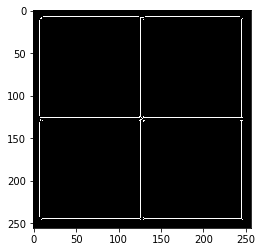

In [4]:
ps1_input0 = cv2.imread('./ps1-input0.png')
# use classic magnitude estimation and Sobel size = 7
ps1_input0_edges = cv2.Canny(ps1_input0, 100, 200, 1, 7, True) 

plt.imshow(ps1_input0_edges, cmap="gray")
plt.show()

### 2. Hough method

#### a.

In [3]:
image = ps1_input0_edges
def hough_transform(image):
    # Initialize empty accumulator (filled with 0)
    # 2 * diag length : for positive and negative max distance. 0 being diag_len
    # 180 because theta from 0 to 180
    width = image.shape[1]
    height = image.shape[0]

    diag_len = np.ceil(np.sqrt(width * width + height * height)) # max distance for rho = length of diag
    rho_range = int(2*diag_len)
    hough_accu = np.zeros([rho_range, 180])

    # get i and j indexes for all indexes 
    j_indexes, i_indexes = np.nonzero(image)

    # Browsing into each pixel of edges picture
    for k in range(len(j_indexes)):
        # getting indexes of edge
        i = i_indexes[k]
        j = j_indexes[k]

        # voting : for each value of theta
        for theta in range(0, 180):
            rho = int(np.round(i * np.cos(np.deg2rad(theta)) + j * np.sin(np.deg2rad(theta))) + diag_len)# positive index for rho
            hough_accu[rho, theta] += 1
    
    return hough_accu
hough_accu = hough_transform(image)

In [4]:
# Peak finding
def peak_finding(hough_accu, min_distance = 45, max_peaks = 6, title ='Hough Transform', path = './trash.png'):

    coordinates = peak_local_max(hough_accu, min_distance=min_distance,
                                 exclude_border = False, num_peaks =max_peaks)
    loca_maxs_rho = coordinates[:, 0]
    loca_maxs_theta = coordinates[:, 1]
    plt.imshow(hough_accu, cmap='gray',aspect='auto')
    plt.title(title)

    # Annotate local maximum
    for i in range(len(loca_maxs_rho)):
        plt.annotate('X',xy=(loca_maxs_theta[i],loca_maxs_rho[i]), arrowprops=dict(facecolor='yellow', shrink=0.05),)
    plt.savefig(path)
    plt.show()
    return loca_maxs_rho, loca_maxs_theta

In [5]:
def draw_line(image, loca_maxs_rho, loca_maxs_theta, rgb = (0,255,0)):
    image_copy = image.copy()
    width = image_copy.shape[1]
    height = image_copy.shape[0]
    diag_len = np.ceil(np.sqrt(width * width + height * height)) 
    for j in range(len(loca_maxs_rho)):
        rho = loca_maxs_rho[j] - diag_len
        theta = loca_maxs_theta[j]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x1=int(a*rho - diag_len*b) 
        y1=int(b*rho + diag_len*a)
        x2=int(a*rho + diag_len*b)
        y2=int(b*rho - diag_len*a)
        #print(x1,y1,x2,y2)
        cv2.line(image_copy, (x1,y1),(x2,y2), rgb, 3) # green line
        #print('Line {} | rho = {} theta = {}'.format(j,loca_maxs_rho[j], loca_maxs_theta[j]))
        plt.imshow(image_copy)
        plt.title('Detected Line')

    plt.show()
    return image_copy

In [6]:
hough_accu = hough_transform(image)

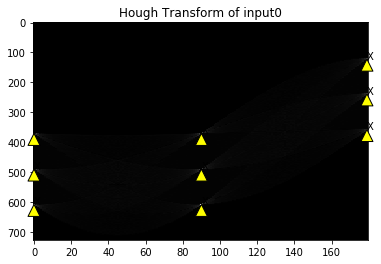

In [7]:
loca_maxs_rho, loca_maxs_theta = peak_finding(hough_accu, max_peaks=50, title='Hough Transform of input0', path = './output/ps1_2_a_1.png')

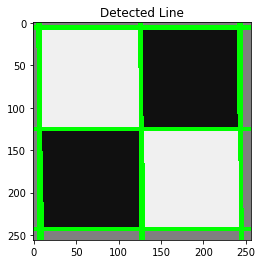

In [8]:
ps1_2_a_2 = draw_line(ps1_input0, loca_maxs_rho, loca_maxs_theta)

In [9]:
mpimg.imsave('./output/ps1-2-a-2.png', ps1_2_a_2)

<u> Justification </u> :

The hough accumulator is a 2D array with dimension :

. width of 180 | So we can iterate over each value of theta (it is a line detector so there is no need for iterating over 360 °). We keep the degree value rather than radian for simplying the interpretation of our results.

. height of 2 times the size of the picture's diagonal | The highest value of rho can be the diagonal size and the lowest is - diagnoal_size. Hence, to keep positive index for our accumulator we consider (accu value of rho) = (real value of rho) + diagonal size.

### 3. Using noised picture 

#### a. Gaussian Filter

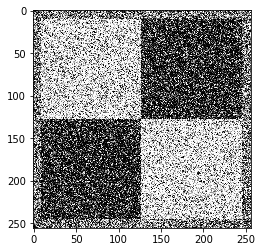

In [10]:
ps1_input0_noised = cv2.imread('./ps1-input0-noise.png')
plt.imshow(ps1_input0_noised, cmap ='gray')
plt.show()

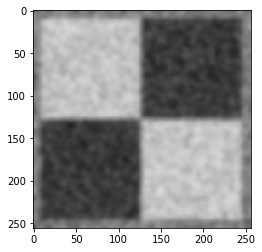

In [11]:
ps1_input0_gaussian = ndimage.filters.gaussian_filter(ps1_input0_noised, sigma=3)
plt.imshow(ps1_input0_gaussian, cmap = 'gray')
plt.show()
misc.imsave('./output/ps1-3-a-1.png', ps1_input0_gaussian)

#### b. Edges detector

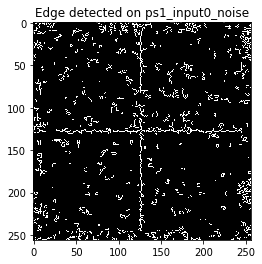

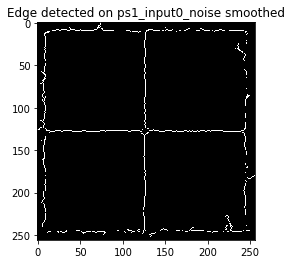

In [12]:
# to avoid noise, we need to set a treshold high enough.
# But not too high so we keep all the edge lines 
ps1_input0_noised_edges = cv2.Canny(ps1_input0_noised,500,1100)
plt.imshow(ps1_input0_noised_edges, cmap = 'gray')
plt.title('Edge detected on ps1_input0_noise')
plt.show()
misc.imsave('./output/ps1-3-b-1.png', ps1_input0_noised_edges)
# easy to see the cross line ine the midle. But boundaries are hard to detect from noise.

# Now applying on the smoothed version
ps1_input0_gaussian_edges = cv2.Canny(ps1_input0_gaussian, 0, 80)
plt.imshow(ps1_input0_gaussian_edges, cmap='gray')
plt.title('Edge detected on ps1_input0_noise smoothed')
plt.show()
misc.imsave('./output/ps1-3-b-2.png', ps1_input0_gaussian_edges)
# no need to set a particular low_treshold; noise is already relatively nicely avoided.
# thanks to gaussian filter


From the two results obtained, it is easy to notice the edges of the cross within the picture. However on the noised picture, boundaries are hard to distinguish from noise. We can expect that the line detector will probably have trouble finding thoses edges.

#### c. Hough Transform

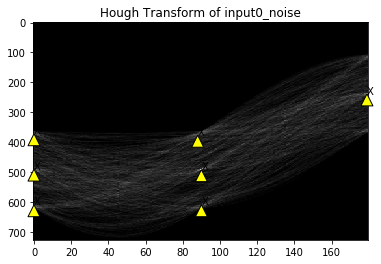

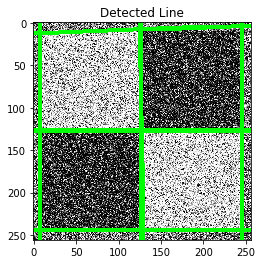

In [13]:
hough_accu_noised = hough_transform(ps1_input0_noised_edges)
loca_maxs_rho, loca_maxs_theta = peak_finding(hough_accu_noised, max_peaks=7,
                                              title = 'Hough Transform of input0_noise')

ps1_3_c_4 = draw_line(ps1_input0_noised, loca_maxs_rho, loca_maxs_theta)

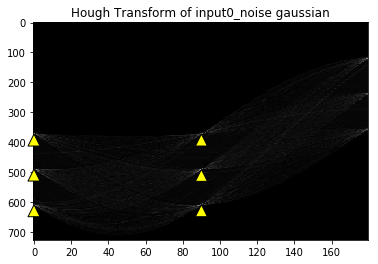

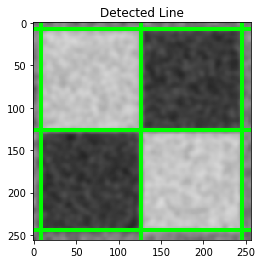

In [14]:
hough_accu_gaussian = hough_transform(ps1_input0_gaussian_edges)
loca_maxs_rho, loca_maxs_theta = peak_finding(hough_accu_gaussian,
                                              title='Hough Transform of input0_noise gaussian',
                                             path = './output/ps1_3_c_1.png') 
ps1_3_c_2 = draw_line(ps1_input0_gaussian, loca_maxs_rho, loca_maxs_theta)

In [15]:
misc.imsave('./output/ps1-3-c-2.png', ps1_3_c_2)

<u> Explication </u> 
We need to set an appropriate low-treshold and high-treshold so we detect as much as possible the edges while trying to avoid the noise (which corresponds to high peaks in the whole picture)

The hough method is detecting many lines which do not correspond to edges on the original picture but are created because of the noise accumulation which altered the voting phase of the method.

The peak finding use local_maximas to detect peaks in the hough accumulator wich corresponds to the (supposingly) most likely lines on the original picture. But because of the noise, many peaks are considered as local_maximas where they shouldn't.

As we only want the real edges, we will treshold the peak_finding method by setting a number of peaks maximal so the method only return the higher local_maximas (max peaks = 6 by default)

### 4. Second image : input 1

#### a. read and smooth

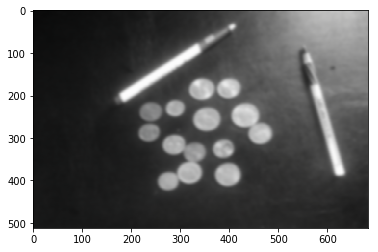

In [16]:
input1 = cv2.imread('./ps1-input1.jpg')
input1_gaussian = ndimage.filters.gaussian_filter(input1, sigma=3)
plt.imshow(input1_gaussian, cmap='gray', aspect= 'auto')
plt.show()

misc.imsave('./output/ps1-4-a-1.png', input1_gaussian)

#### b. edge detector

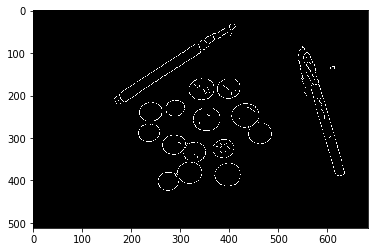

In [17]:
input1_gaussian_edges = cv2.Canny(input1_gaussian,30,40)
plt.imshow(input1_gaussian_edges, cmap = 'gray', aspect= 'auto')
plt.show()
misc.imsave('./output/ps1-4-b-1.png', input1_gaussian_edges)

# Treshold are set low, no noise, so all edges are considered okay.

#### c. Hough Transform

In [18]:
hough_accu = hough_transform(input1_gaussian_edges)

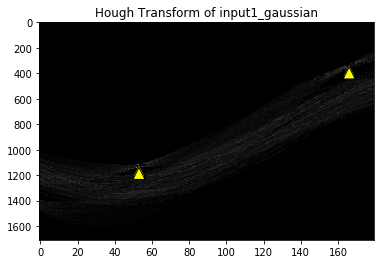

In [19]:
loca_maxs_rho, loca_maxs_theta= peak_finding(hough_accu,  10, max_peaks = 4, title='Hough Transform of input1_gaussian', path = './output/ps1_4_c_1.png')

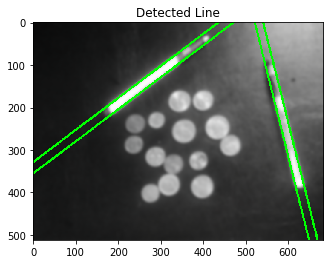

In [20]:
ps1_4_c_2 = draw_line(input1_gaussian, loca_maxs_rho, loca_maxs_theta)

In [21]:
misc.imsave('./output/ps1-4-c-2.png', ps1_4_c_2)

<u> Explication </u> 

From the hough transform picture (b.) local maximas are very close almost same theta / rho). This is due to the fact that pens' edges are parallel and close lines. 

Local maxima can be computed for a certain distance, here it is important to set a small distance for this computation. Indeed we don't want to consider one local maxima for both lines but two actual and distinct peaks. We set the value min distance = 10. 

However, setting such a small ditance, to compute local max on, leads to the detection of many particular and unwanted smaller local maximas. We limit at 4 the number of peaks searched so we make sure to detect only the 4 higher peaks.


### 5. Circles detection

#### a. input1 circles detection

In [22]:
def hough_transform_circle(image, image_edges, max_rad):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Initialize empty accumulator (filled with 0)
    height = image.shape[0]
    width = image.shape[1]

    hough_accu = np.zeros([height, width, max_rad])
    # get row and columns indexes for all indexes 
    rr_indexes, cc_indexes = np.nonzero(image_edges)
    
    # compute gradient xx and yy from original picture
    gxx = cv2.Sobel(image,cv2.CV_32FC1,1,0);
    gyy = cv2.Sobel(image,cv2.CV_32FC1,0,1);
    # compute gradient direction for each point
    theta_values = cv2.phase(gxx,gyy,angleInDegrees=True);

    # Browsing into each pixel of edges picture
    for k in range(len(rr_indexes)):
        # getting indexes of edge
        y = rr_indexes[k]
        x = cc_indexes[k]
        theta = np.deg2rad(theta_values[y,x])

        for radius in range(0, max_rad):
            a = x + radius * np.cos(theta)
            b = y + radius * np.sin(theta)
            if (b < height) & ( a>=0 ) & ( b>=0 ) & (a < width) :
                hough_accu[b, a, radius] += 1

    return hough_accu

In [23]:
def peak_finding_circle(hough_accu_circle, min_dist = 20, max_peaks=10, title ='Hough Transform circle'): 
    coordinates = peak_local_max(hough_accu_circle, min_distance = min_dist,
                                 exclude_border = False, num_peaks = max_peaks)
    loca_maxs_b = coordinates[:, 0]
    loca_maxs_a = coordinates[:, 1]
    loca_maxs_radius = coordinates[:, 2]
    
    return loca_maxs_a, loca_maxs_b, loca_maxs_radius

In [24]:
def draw_circle(image, loca_maxs_a, loca_maxs_b, loca_maxs_radius, min_rad = 0, title = 'Detected Circle'):
    image_copy = image.copy()
    for j in range(len(loca_maxs_a)):
        a = loca_maxs_a[j]
        b = loca_maxs_b[j]
        radius = loca_maxs_radius[j]
        if (radius > min_rad): 
            cv2.circle(image_copy, (a, b), radius, (255,0,0), 2)
        #print('Cercle {} | b(row)= {} a(col) = {} radius = {}'.format(j,loca_maxs_b[j], loca_maxs_a[j], loca_maxs_radius[j]))
    plt.imshow(image_copy)
    plt.title(title)

    plt.show()
    return image_copy

In [25]:
hough_accu_circle = hough_transform_circle(input1_gaussian, input1_gaussian_edges, 100)

/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [26]:
loca_maxs_a, loca_maxs_b, loca_maxs_radius = peak_finding_circle(
    hough_accu_circle,  max_peaks = 15, title='Hough Transform of input1_gaussian')

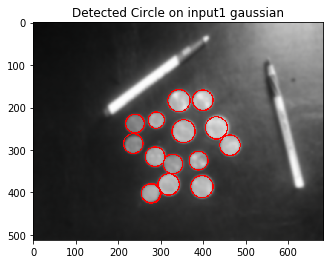

In [27]:
ps1_5_a_2 = draw_circle(input1_gaussian, loca_maxs_a, loca_maxs_b, loca_maxs_radius, title = "Detected Circle on input1 gaussian")

In [28]:
misc.imsave('./output/ps1-5-a-1.png', input1_gaussian_edges)
misc.imsave('./output/ps1-5-a-2.png', ps1_5_a_2)

<u> Explication </u>

The hough method to detect the circles first compute the picture's gradient on x and y before calculating the phase between each gradient value. Hence we have, for each pixel, the corresponding value of theta that we are lookig for to detect the circle center.

This save computation time because there is no more need for iterating through all the theta values.

Rmk: this method includes also the possibility to pass a maximum value for limiting the values of radius tested. We will use it later in this assignment.

Here, local maximas are nicely detected, but we restricted the peaks to the 15 highest in order to see the circles corresponding to the coins detected, and only them.

We have used a gaussian filter with a sigma = 3. This helped reducing the noise and we can see that our Canny filter doesn't need very high tresholds to provides a good estimation of the edges on the pictures, which leads to good voting phase in the accumulator and a great detection of our circles parameters.

### 6. Realistic image - clutter

#### a. Line Finder

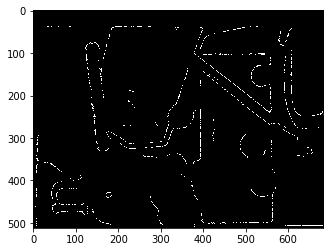

In [29]:
input2 = cv2.imread('./ps1-input2.jpg')
input2_gaussian = ndimage.filters.gaussian_filter(input2, sigma = 5)
input2_edges = cv2.Canny(input2_gaussian, 40, 60, 1, 3, True) 
plt.imshow(input2_edges, cmap= 'gray')
plt.show()

In [30]:
hough_accu_6a = hough_transform(input2_edges)

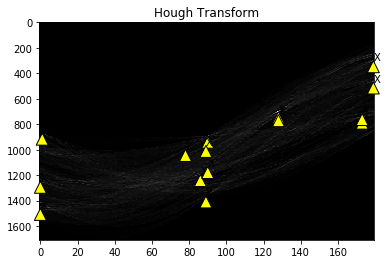

In [31]:
loca_maxs_rho, loca_maxs_theta =  peak_finding(hough_accu_6a, 20, max_peaks = 15)

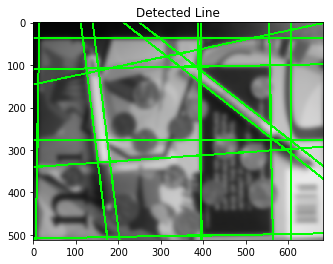

In [32]:
ps1_6_a_1 = draw_line(input2_gaussian, loca_maxs_rho, loca_maxs_theta)

In [33]:
misc.imsave('./output/ps1-6-a-1.png', ps1_6_a_1)

#### b. Why other lines ?

While looking at the edges detector, we can see that many straight edges are detected. Indeed, in the original picture, some straight line are detected on the 'magazine' where pens are. The Canny edge detector doesnt differenicate the edges of real objects from linear pattern drawn or simply present on the picture.

Here, to emphasize the probleme the number of peaks is not restricted (max = 15) so we can clearly see the problem we face (many lines detected).

#### c. Solutions 

To solve this issue, we can :<br>
. 1 alter the peak finding or canny edge tresholdso we only detect stronger edges.<br>
. 2 check for a minium length of the lines <br>
. 3 check for eventual parallel lines (that) <br>

It turns out that, stronger edges, in our case, doesn't necessarily correspond to the pens'
boundaries. So the first solution could not really  be used.
The second option, won't be of great help neither, because, many 'lines' have almost the same size of our pens (the accumulator doesnt make the difference between many small cut lines or one big lines).

However, the third solution is interesting because, our pens have parallel edges so we could based our choice on that criteria : For each line found, is ther an other line with the same slope (filter on theta relation) ?

Also we should consider the 'width' of the pen. Indde, we can notice that lines corresponding of pens' edges are closer than other detected edges. Hence we can also apply an other 'filter' on top of the previous parallel filter that will keep lines parallel within a certain range (filter on rho relation). 
Rmk : in our case, we don't take into consideration the scale. But the width of pens on the picture depends on the level of zoom we are. This could be solved by considering a factor of zoom as a parameter.

In [34]:
def filter_parallel_lines(loca_maxs_rho, loca_maxs_theta):
    new_loca_maxs_rho = np.array([])
    new_loca_maxs_theta = np.array([])
    for theta, rho in zip(loca_maxs_theta, loca_maxs_rho):
            # looking for parallel lines
            (indx,) = np.where((loca_maxs_theta == theta))
            if (indx.size > 1):
                new_loca_maxs_rho = np.append(new_loca_maxs_rho, rho)
                new_loca_maxs_theta = np.append(new_loca_maxs_theta, theta)

    return new_loca_maxs_rho, new_loca_maxs_theta

def filter_close_lines(loca_max_rho, loca_maxs_theta, max_dist):
    new_loca_maxs_rho = np.array([])
    new_loca_maxs_theta = np.array([])
    for theta, rho in zip(loca_maxs_theta, loca_maxs_rho):
            # looking for close line
            (indx,) = np.where((np.abs((loca_maxs_rho - rho)) < max_dist))
            if (indx.size > 1):
                new_loca_maxs_rho = np.append(new_loca_maxs_rho, rho)
                new_loca_maxs_theta = np.append(new_loca_maxs_theta, theta)

    return new_loca_maxs_rho, new_loca_maxs_theta

In [35]:
loca_maxs_rho, loca_maxs_theta = filter_parallel_lines(np.array(loca_maxs_rho), 
                                                     np.array(loca_maxs_theta))
loca_maxs_rho, loca_maxs_theta = filter_close_lines(np.array(loca_maxs_rho), 
                                                     np.array(loca_maxs_theta), 30)

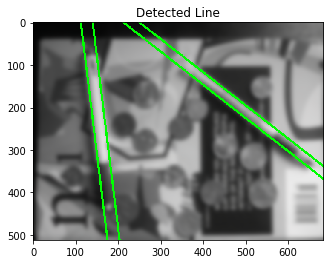

In [36]:
ps1_6_c_1 = draw_line(input2_gaussian, loca_maxs_rho, loca_maxs_theta)

In [37]:
misc.imsave('./output/ps1-6-c-1.png', ps1_6_c_1)

### 7. Finding circles on realistic images

#### a. First detection

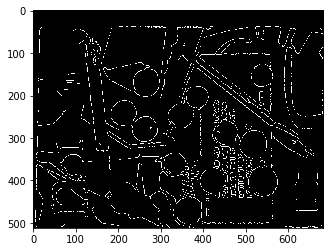

In [38]:
input2 = cv2.imread('./ps1-input2.jpg')
input2_gaussian = ndimage.filters.gaussian_filter(input2, sigma = 2)
input2_edges = cv2.Canny(input2_gaussian, 13000, 19000, 1, 7, True) 
plt.imshow(input2_edges, cmap= 'gray')
plt.show()

In [39]:
hough_accu_6a_circle = hough_transform_circle(input2_gaussian, input2_edges, max_rad= 100)

/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [40]:
loca_maxs_a, loca_maxs_b, loca_maxs_radius =  peak_finding_circle(hough_accu_6a_circle, 
                                                                  max_peaks = 30,
                                                                  title='Hough Transform of input2 smoothed')


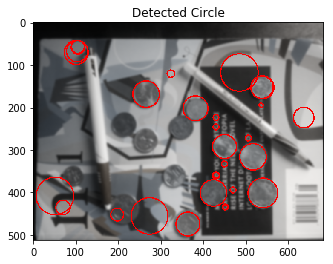

In [41]:
ps1_6_c_0 = draw_circle(input2_gaussian, loca_maxs_a, loca_maxs_b, loca_maxs_radius)

### b. False alarms

We can see that there are many false positives and false-negatives. Curved line in the picture are also considered as circles, and some coins are note detected.

By looking at the original edges detector picture, we can notice that some curved line edges appear while some coins' edges are not clearly detected.

<u> 1. Constraint on range of radius </u>

We could apply a filter that would keep only the circles within a min_range and max_range.
Since the max_range is already a parameter of our hough_accumulator_circle function, we just have to implement the min_range filter.

In [42]:
hough_accu_6a_circle = hough_transform_circle(input2_gaussian, input2_edges, max_rad= 40)

/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [43]:
loca_maxs_a, loca_maxs_b, loca_maxs_radius =  peak_finding_circle(hough_accu_6a_circle, 
                                                                  max_peaks = 30,
                                                                  min_dist = 10,
                                                                  title='Hough Transform of input2 smoothed')

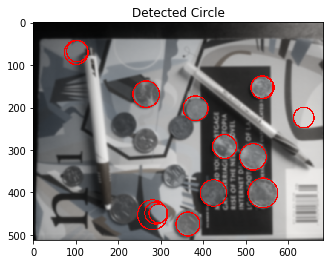

In [44]:
ps1_6_c_1 = draw_circle(input2_gaussian, loca_maxs_a, loca_maxs_b, loca_maxs_radius, min_rad = 20)


<u> 2. Constraint on color variance within each circle </u>

We can also notice that we are here, trying to detect coins that all have consistent (constant) colored pixels within their edges. Hence we could use this criteria to remove non-coins detected circles. We will treshold the standard deviation of all the pixels values within each circle.

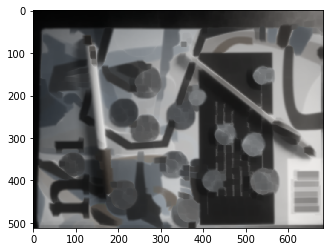

In [45]:
kernel = np.ones((5,5), np.uint8)
# applying erosion to flat the color to detect coins with similar color.
input2_li_erode = cv2.erode(input2_gaussian, kernel, iterations = 2)
plt.imshow(input2_li_erode)
plt.show()

In [46]:
def filter_homogenous_color_circle(img, loca_maxs_a, loca_maxs_b, loca_maxs_radius, std_treshold):
    new_as, new_bs, new_rads = np.array([], dtype = int), np.array([], dtype = int),np.array([], dtype = int)
    for a, b, radius in zip(loca_maxs_a, loca_maxs_b, loca_maxs_radius):
        rr, cc = circle(b, a, radius)
        stds = np.std(img[rr,cc])
        if (stds < std_treshold):
            new_as = np.append(new_as, int(a))
            new_bs = np.append(new_bs, int(b))
            new_rads = np.append(new_rads, int(radius))
    return new_as, new_bs, new_rads

In [47]:
loca_maxs_a_ho, loca_maxs_b_ho, loca_maxs_radius_ho = filter_homogenous_color_circle(input2_li_erode,loca_maxs_a, loca_maxs_b, loca_maxs_radius, std_treshold = 30)

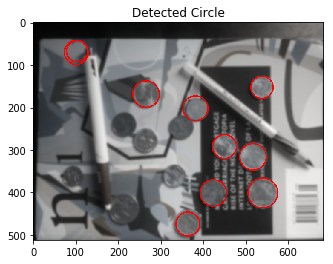

In [48]:
ps1_7_a_1 = draw_circle(input2_gaussian, loca_maxs_a_ho, loca_maxs_b_ho, loca_maxs_radius_ho, min_rad = 20)

We can see that the bottom circle with a variance of color relatively high (from black to white) has been filtered. Unfortunately it didnt remove the circle detected at the far right of the picture as the variance of the pixel values remains really low.

<u> 3. Constraint on line influence </u>

Finally, the edge detector makes us realize that some circles are detected because of curved lines. We will try to remove the edges corresponding to lines (by using the hough method for detecting lines) and see if it helps keeping only the circles.


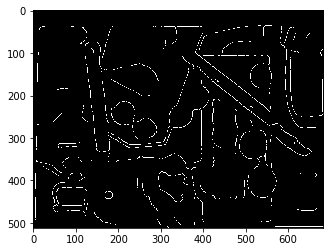

In [49]:
input2 = cv2.imread('./ps1-input2.jpg')
input2_gaussian = ndimage.filters.gaussian_filter(input2, sigma = 5)
# aaplying dilation here to exagerate the shapes of the line
input2_li_dilate = cv2.dilate(input2_gaussian, kernel, iterations = 1)
input2_edges_dil = cv2.Canny(input2_li_dilate, 8000, 10000, 1, 7, True) 
plt.imshow(input2_edges_dil, cmap= 'gray')
plt.show()


In [50]:
hough_accu_7 = hough_transform(input2_edges_dil)

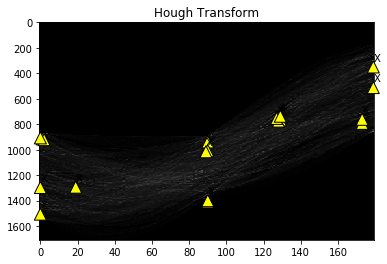

In [51]:
loca_maxs_rho, loca_maxs_theta =  peak_finding(hough_accu_7, 5, max_peaks = 20)

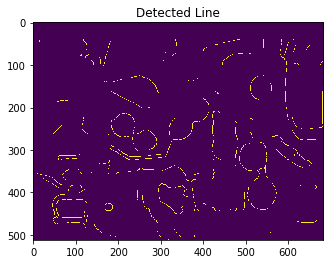

In [52]:
input2_edges_no_lines = draw_line(input2_edges_dil, loca_maxs_rho, loca_maxs_theta, rgb = (0,0,0))

In [53]:
# lets try now on this new edges

In [54]:
hough_accu_7_circle_nol = hough_transform_circle(input2_gaussian, input2_edges_no_lines, max_rad= 40)

/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [55]:
loca_maxs_a_nol, loca_maxs_b_nol, loca_maxs_radius_nol =  peak_finding_circle(hough_accu_7_circle_nol, 
                                                                  max_peaks = 30,
                                                                  min_dist = 20,
                                                                  title='Hough Transform of input2 smoothed')

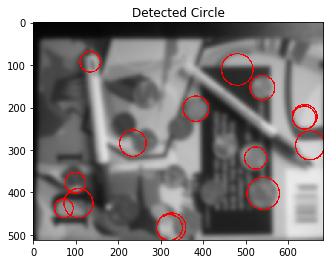

In [56]:
no_lines_input2_circles = draw_circle(input2_gaussian, loca_maxs_a_nol, loca_maxs_b_nol, loca_maxs_radius_nol, min_rad = 20)

We can see that circles in the far right are still detected because of the curved line. Hence this method didn't help, here. 

We will keep the 2 methods (constraint on radius and color invariance) above, considering that there none of them provides 100% of accuracy or detection (false positives and false negatives).

In [57]:
misc.imsave('./output/ps1-7-a-1.png', ps1_7_a_1)

In [58]:
# imsave homogenous_circles

### 8. Distortion sensitivity

#### a. Lines & circles detection

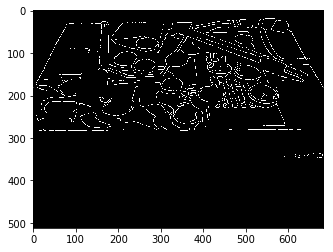

In [59]:
input3 = cv2.imread('ps1-input3.jpg')
input3_gaussian = ndimage.filters.gaussian_filter(input3, sigma = 2)
input3_edges = cv2.Canny(input3_gaussian, 10, 60, 1, 3, True) 
plt.imshow(input3_edges, cmap = 'gray')
plt.show()

In [60]:
hough_accu_8a = hough_transform(input3_edges)

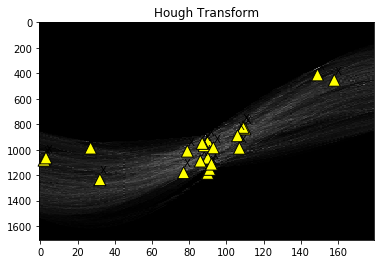

In [62]:
loca_maxs_rho_8, loca_maxs_theta_8 = peak_finding(hough_accu_8a, min_distance= 10, max_peaks=22)

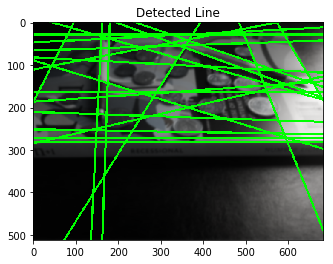

In [63]:
input3_gaussian_with_line = draw_line(input3_gaussian, loca_maxs_rho_8, loca_maxs_theta_8)

As we can see, to detect the 4 lines edges of our 2 pens, we had to detect 22 lines in total. Many lines have been detected for the same reasons as before (lines on the picture, or edges of magazines). 

Also, because of the distortion (angle of picture is inclined), many edges appear to be on the same line because the picture is taken on the side.

In [64]:
hough_accu_8a_circle = hough_transform_circle(input3_gaussian, input3_edges, max_rad= 40)

/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [65]:
loca_maxs_a_8, loca_maxs_b_8, loca_maxs_radius_8 = peak_finding_circle(hough_accu_8a_circle,
    min_dist = 20)

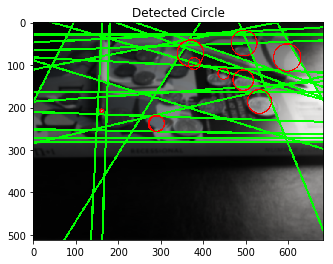

In [66]:
ps1_8_a_1 = draw_circle(input3_gaussian_with_line, loca_maxs_a_8, loca_maxs_b_8, loca_maxs_radius_8)

In [67]:
misc.imsave('./output/ps1-8-a-1.png', ps1_8_a_1)

#### b. Ellipse ?

Circles are detected but doesnt correspond to the coins on the pictures. Because of the distortion circle shapes have become ellipse shapes. A solution would be to build an hough transform that detects ellispes rather than circles.

This is a much more complexe alogithm as it now have to find 5 parameters insted of 3 (for circles) and 2(for lines). 

We will use the algorithm discovered by : Xie, Yonghong, and Qiang Ji.
<i>“A new efficient ellipse detection method.” Pattern Recognition, 2002. Proceedings. 16th International Conference on. Vol. 2. IEEE, 2002.</i>

Parameters are :
(x0, y0) for the center, alpha for the orientation, (a,b) for the major and minor axes.

In [68]:
def compute_ellipse_params(x1, y1, x2, y2):
    x0 = (x1 + x2)/2
    y0 = (y1 + y2)/2
    alpha = mt.atan((y2 - y1)/(x2 - x1))
    return int(x0), int(y0), int(alpha)

def compute_ellipse_minor_axis(a, d, f):
    theta = mt.acos(
        (mt.pow(a,2) + mt.pow(d,2) - mt.pow(f,2)) /
        (2 * a * d)
    )
    b = mt.sqrt(
        (mt.pow(a,2) * mt.pow(d,2) * mt.pow(mt.sin(theta),2)) / 
        (mt.pow(a,2) - mt.pow(d,2) * mt.pow(mt.cos(theta),2))
    )
    return int(b)


def hough_transform_ellispe(image, min_pair_dist = 5, min_treshold = 1):
    # empty 1D accumulator
    width = image.shape[1]
    height = image.shape[0]
    diag_len = np.ceil(np.sqrt(width * width + height * height)) # max distance for rho = length of diag
    ellipses = np.array([])
    hough_accu = np.zeros([diag_len])
    
    # get i and j indexes for all indexes 
    y_indexes, x_indexes = np.nonzero(image)
    
    
    # for each 1st pair (x1, y1)
    for x1 in x_indexes:
        for y1 in y_indexes:
            if (image[y1, x1] > 0):
                # for each 2nd pair (x2, y2):
                for x2 in x_indexes:
                    for y2 in y_indexes:
                        if (image[y2, x2] > 0):
                            if ((x2 != x1) & (y2 != y1)) :
                                # euclidian distance between pair1 and pair2
                                dist_p1_p2 = np.linalg.norm(
                                    np.array((x1, y1)) - np.array((x2, y2)))

                                if (dist_p1_p2 > min_pair_dist) :
                                    x0, y0, alpha = compute_ellipse_params(x1, y1, x2, y2)
                                    a = int(dist_p1_p2/2) # major axis a

                                    # for each 3rd pair (x, y):
                                    for x in x_indexes:
                                        for y in y_indexes:
                                            if (image[y, x] > 0):
                                                if (((x2 != x) & (y2 != y)) & 
                                                    ((x1 != x) & (y1 != y))):
                                                    # euclidian distance between pair1 and pair2
                                                    dist_p0_p3 = np.linalg.norm(
                                                        np.array((x0, y0)) - np.array((x, y)))
                                                    dist_p0_p1 = np.linalg.norm(
                                                        np.array((x0, y0)) - np.array((x1, y1)))
                                                    dist_p0_p2 = np.linalg.norm(
                                                        np.array((x0, y0)) - np.array((x2, y2)))
                                                    if (
                                                        (dist_p0_p3 > min_pair_dist) & 
                                                        ((dist_p0_p3 < dist_p0_p1) | 
                                                         (dist_p0_p3 < dist_p0_p2))):
                                                        d = dist_p0_p3
                                                        f = dist_p0_p2
                                                        b = compute_ellipse_minor_axis(a, d, f)
                                                        ## increment hough accu for this b
                                                        hough_accu[b] += 1

                                    # find max value in houg_accu
                                    max_b = np.argmax(hough_accu)
                                    votes_for_b = hough_accu[max_b]
                                    if (votes_for_b > min_treshold):
                                        major_axis = 2*a
                                        minor_axis = max_b
                                        ellipses = np.append(ellipses, 
                                                             [x0, 
                                                              y0, 
                                                              major_axis, 
                                                              minor_axis, 
                                                              alpha])
                                        # remove pixels of ellipse in the edges picture
                                        rr, cc = ellipse_perimeter(y0, 
                                                                   x0, 
                                                                   int(minor_axis/2), 
                                                                   int(major_axis/2), 
                                                                   orientation = alpha)
                                        y_indexes, x_indexes = np.nonzero(image)
                                        print(len(y_indexes))
                                        image[rr, cc] = 0
                                        y_indexes, x_indexes = np.nonzero(image)
                                        print(len(y_indexes))
                                        cv2.ellipse(input3_gaussian_cop,
                                                (ellipse[0], ellipse[1]),
                                                (ellipse[2], ellipse[3]),
                                                ellipse[4],0,360,255,1)
                                        plt.imshow(input3_gaussian_cop, cmap= 'gray')
                                        plt.show()
                                    hough_accu = np.zeros([diag_len])
                            
    return ellipses

For computation complexity reason, it was impossible (too long) to see the result on the input3. The algorithm can be tested on targeted picture. 

In [ ]:
input3 = cv2.imread('ellipse.png')
input3_gaussian = ndimage.filters.gaussian_filter(input3, sigma = 2)
input3_gaussian_cop = input3_gaussian.copy()
input3_edges = cv2.Canny(input3_gaussian, 10, 60, 1, 3, True) 
#plt.imshow(input3_edges, cmap = 'gray')
#plt.show()

In [ ]:
#ellipses = hough_transform_ellispe(input3_edges, min_pair_dist= 49, min_treshold= 500)